In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

import warnings
warnings.filterwarnings('ignore')

In [51]:
columns =['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
         'policy_annual_premium', 'umbrella_unit', 'insured_zip', 'insured_sex', 'insured_education_level', 'Insured_occupation',
         'insured_hobbies', 'insured_relationship', 'capital_gain', 'capital_loss', 'incident_date', 'incident_type',
         'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 
         'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'body_injuries', 'witness', 
          'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
         'auto_model', 'auto_year', 'fraud_reported']

df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv',
               names =columns, header =None)
df =df.sample(frac =1)
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_unit,insured_zip,...,witness,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
352,65,26,360770,21-09-2005,IN,100/300,500,1285.03,3000000,457942,...,3,?,52200,5220,10440,36540,Honda,CRV,2011,N
835,370,55,528259,22-12-2012,IN,500/1000,2000,1389.13,7000000,456203,...,2,?,9000,900,1800,6300,Mercedes,ML350,2015,N
927,156,32,449263,20-03-1992,IL,250/500,500,1479.48,0,444413,...,3,YES,74690,6790,13580,54320,Dodge,RAM,2008,Y
136,200,40,932502,11-05-2010,IL,100/300,1000,1439.34,0,444822,...,0,NO,3690,410,410,2870,Ford,Escape,2015,N
735,293,45,235097,28-04-1992,IL,100/300,1000,1119.23,0,447560,...,1,NO,51210,11380,5690,34140,Jeep,Wrangler,2015,N
871,133,34,467841,11-10-1994,IN,500/1000,500,1074.07,0,440833,...,0,YES,4200,420,840,2940,Jeep,Wrangler,2013,N
974,234,41,291006,16-05-1990,IN,100/300,500,951.56,0,455426,...,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y
71,222,41,260845,11-11-1998,OH,100/300,2000,1055.53,0,441992,...,2,NO,61290,6810,6810,47670,Honda,Civic,1995,Y
637,292,45,808544,05-02-1991,IL,500/1000,1000,1358.91,0,451470,...,2,?,7370,670,1340,5360,Suburu,Impreza,1997,N
32,155,35,336614,01-08-2003,IL,500/1000,1000,1088.34,0,614780,...,3,NO,29790,3310,3310,23170,BMW,3 Series,2008,N


In [52]:
# Checking duplicate records
print("No. of duplicate records are :", df.duplicated().sum())

No. of duplicate records are : 0


In [53]:
df.shape

(1000, 39)

In [54]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_unit                    int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
Insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gain                     int64
capital_loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [55]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_unit,insured_zip,capital_gain,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,body_injuries,witness,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [56]:
# Checking null values
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_unit                   0
insured_zip                     0
insured_sex                     0
insured_education_level         0
Insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital_gain                    0
capital_loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
body_injuries                   0
witness       

In [57]:
# Filling null values
df['authorities_contacted'] =df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [58]:
# Again checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_unit                  0
insured_zip                    0
insured_sex                    0
insured_education_level        0
Insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gain                   0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
body_injuries                  0
witness                        0
police_rep

In [59]:
# Checking count of each column
for i in df:
    print(df[i].value_counts())

months_as_customer
194    8
254    7
230    7
140    7
128    7
      ..
251    1
453    1
13     1
281    1
411    1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
31    42
30    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
27    24
47    24
57    16
25    14
49    14
55    14
53    13
50    13
61    10
54    10
24    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
63     2
64     2
19     1
22     1
20     1
Name: count, dtype: int64
policy_number
360770    1
589749    1
376879    1
687639    1
620020    1
         ..
428230    1
751612    1
442795    1
815883    1
626808    1
Name: count, Length: 1000, dtype: int64
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
21-09-2005    2
05-01-1992    2
             ..
13-08-2004    1
26-01-2011    1
29-02-1992    1
06-05-2002    1
26-10-2012    1
Name: count, Length:

In [60]:
# Replacing ? with Nan
df =df.replace('?', np.NaN)

In [61]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_unit                    0
insured_zip                      0
insured_sex                      0
insured_education_level          0
Insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gain                     0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
body_injuries       

In [62]:
# Filling null values
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [63]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_unit                  0
insured_zip                    0
insured_sex                    0
insured_education_level        0
Insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gain                   0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
body_injuries                  0
witness                        0
police_rep

__We have treated all null values.__

In [64]:
# Checking datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_unit                    int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
Insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gain                     int64
capital_loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

__We will delete policy_number and policy_bind_date as these columns does not have any impact on label.__

In [65]:
# Deleting policy_number and policy_bind_date
df.drop(columns =['policy_number', 'policy_bind_date'], inplace =True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 352 to 13
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_unit                1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  Insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital_gain           

In [67]:
# Seperating Numerical and Categorical Columns

# Seperating Numerical Columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        num_cols.append(i)
        
# Seperating Categorical Columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)
print('\n')
print("Number of numerical columns are :",len(num_cols))
print("Number of categorical columns are :", len(cat_cols))

Numerical Columns are : ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_unit', 'insured_zip', 'capital_gain', 'capital_loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'body_injuries', 'witness', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
Categorical Columns are : ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'Insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Number of numerical columns are : 17
Number of categorical columns are : 20


# Univariate Analysis

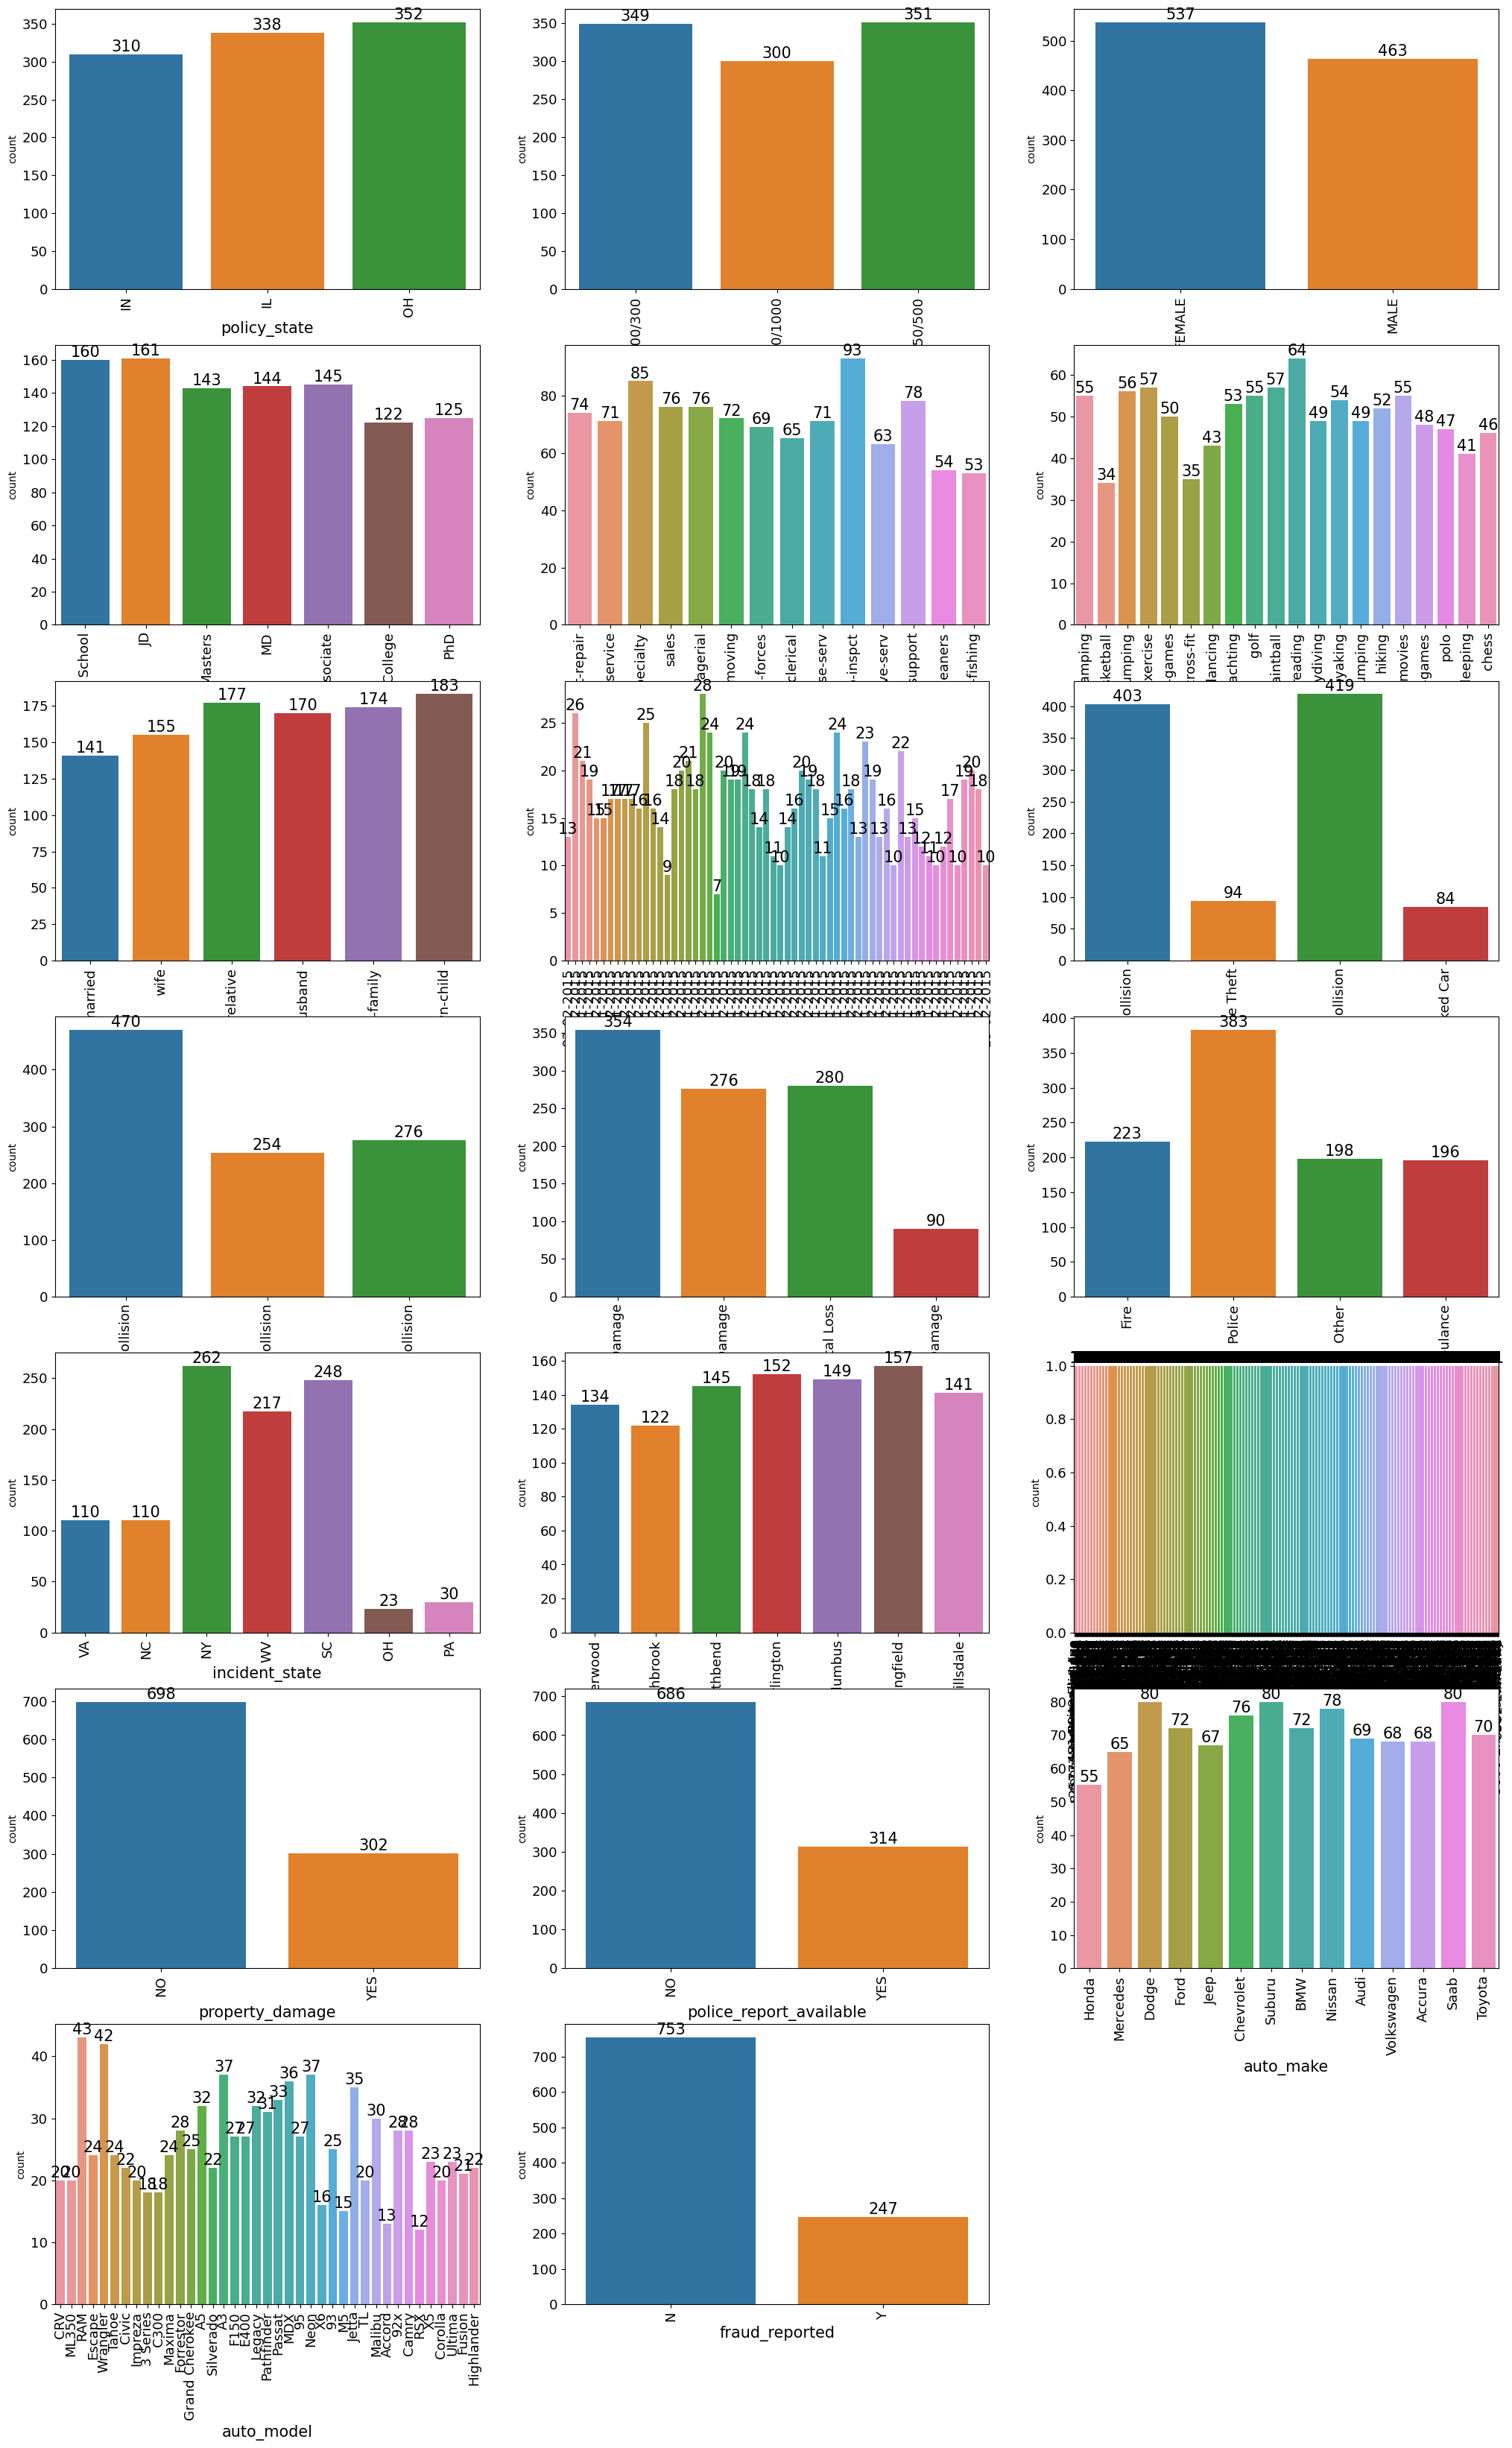

In [68]:
# Plotting countplot for categorical columns
plt.figure(figsize =(25, 85)).set_figheight(40)
plotnumber =1

for i in cat_cols:
    if plotnumber <=20:
        plt.subplot(7, 3, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0], fontsize =15)
        plt.xlabel(i, fontsize =15)
        plt.xticks(rotation =90, fontsize =13)
        plt.yticks(rotation =0, fontsize =13)
        
    plotnumber+=1
plt.show()

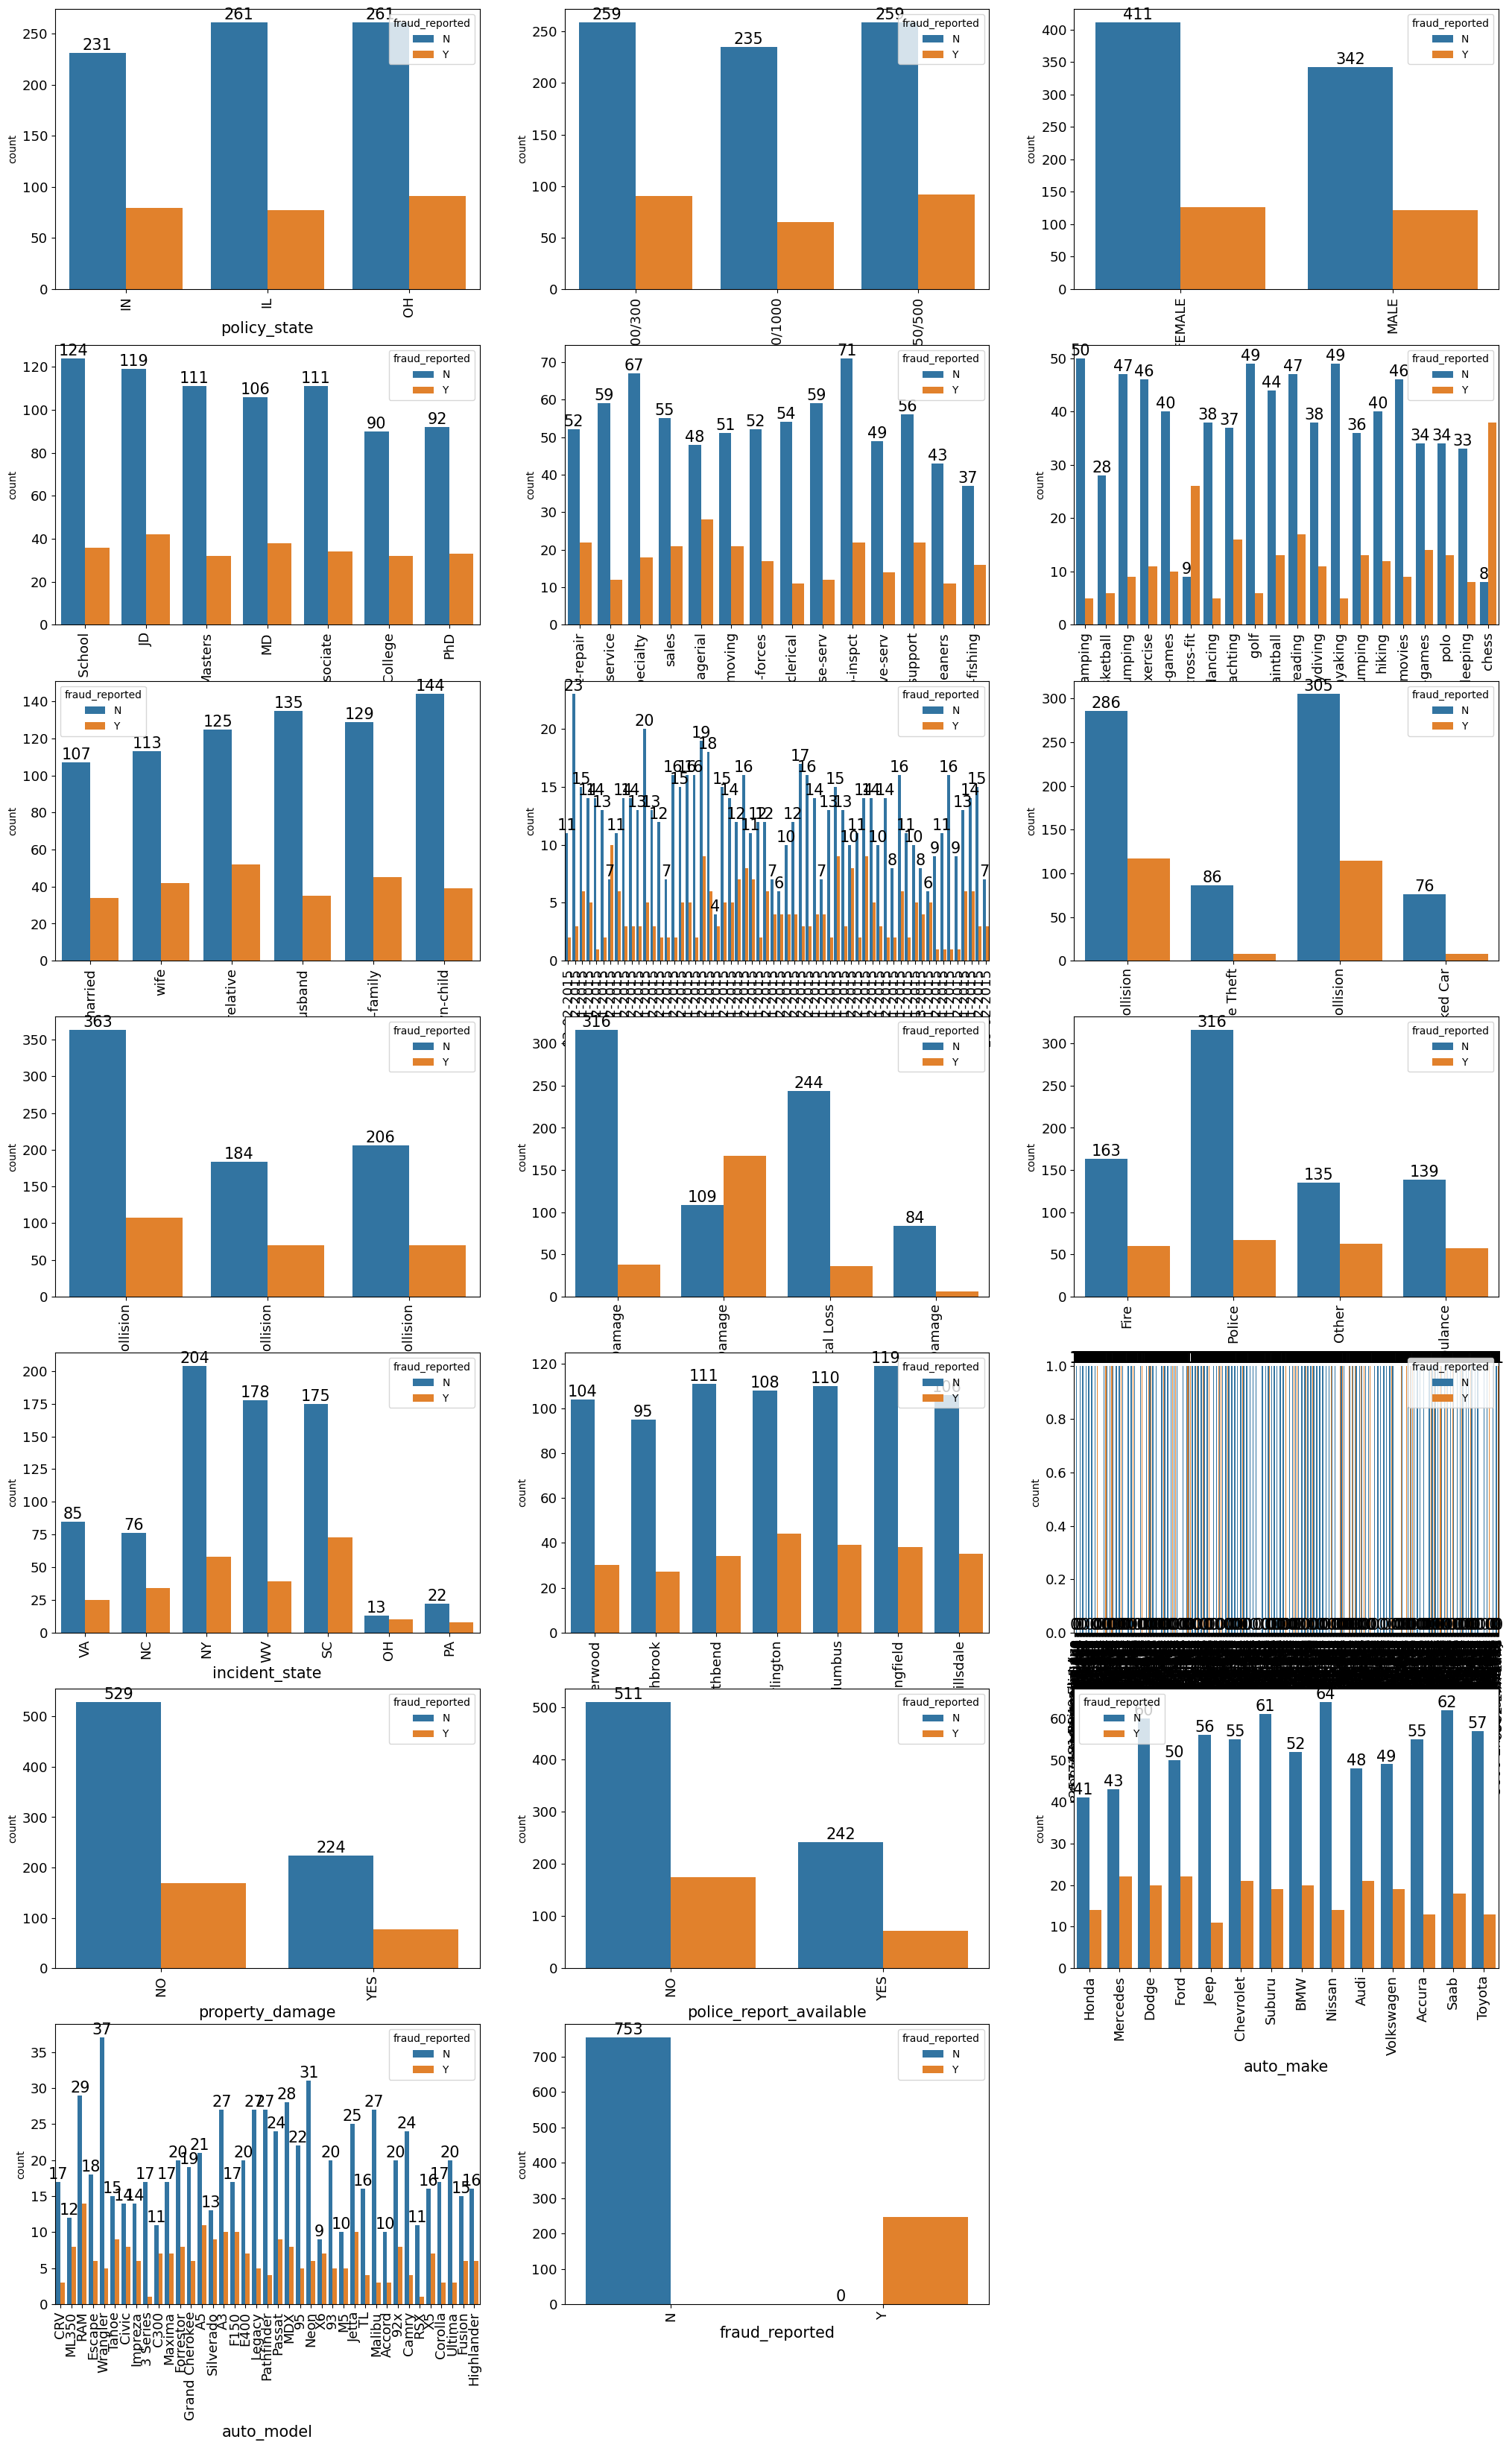

In [69]:
# Plotting countplot for categorical columns
plt.figure(figsize =(25, 85)).set_figheight(40)
plotnumber =1

for i in cat_cols:
    if plotnumber <=20:
        plt.subplot(7, 3, plotnumber)
        ax =sns.countplot(x =i, hue ='fraud_reported', data =df)
        ax.bar_label(ax.containers[0], fontsize =15)
        plt.xlabel(i, fontsize =15)
        plt.xticks(rotation =90, fontsize =13)
        plt.yticks(rotation =0, fontsize =13)
        
    plotnumber+=1
plt.show()

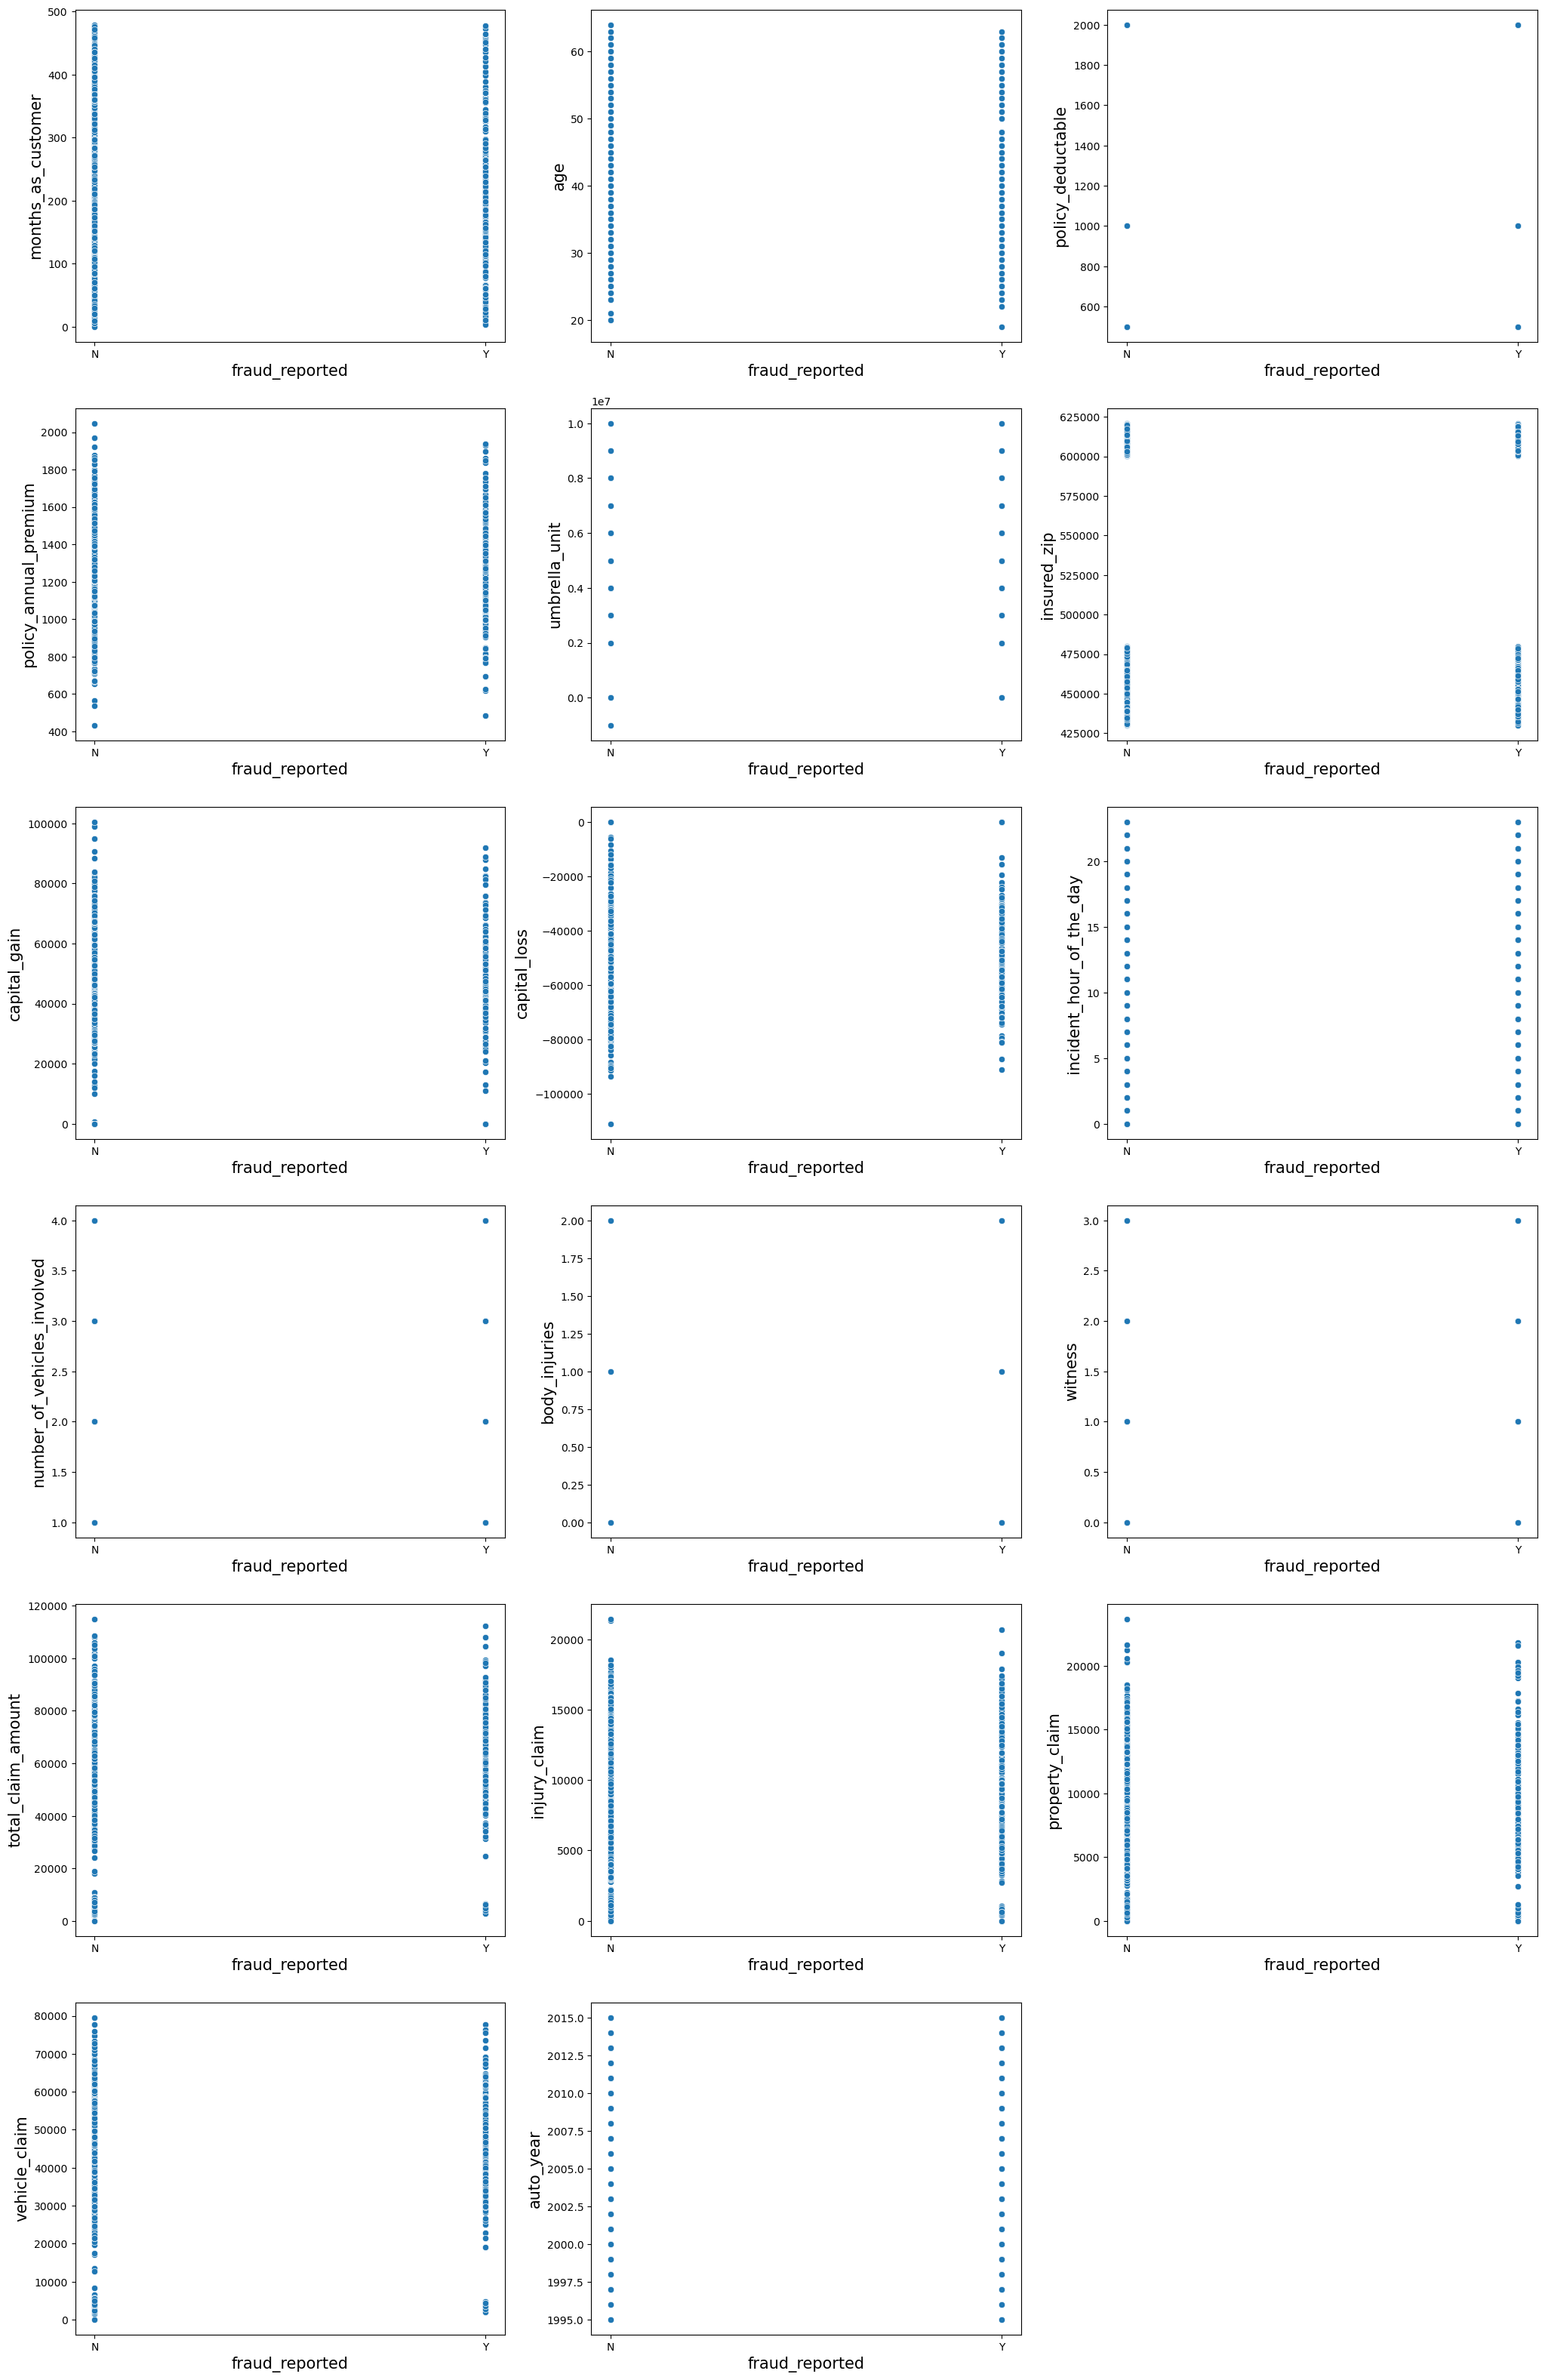

In [70]:
# Plotting scatterplot for numerical columns
plt.figure(figsize =(25, 85)).set_figheight(40)
plotnumber =1

for i in num_cols:
    if plotnumber <=20:
        plt.subplot(6, 3, plotnumber)
        sns.scatterplot(x ='fraud_reported', y =i, data =df)
        plt.xlabel('fraud_reported', fontsize =15)
        plt.ylabel(i, fontsize =15)
    plotnumber+=1
plt.show()

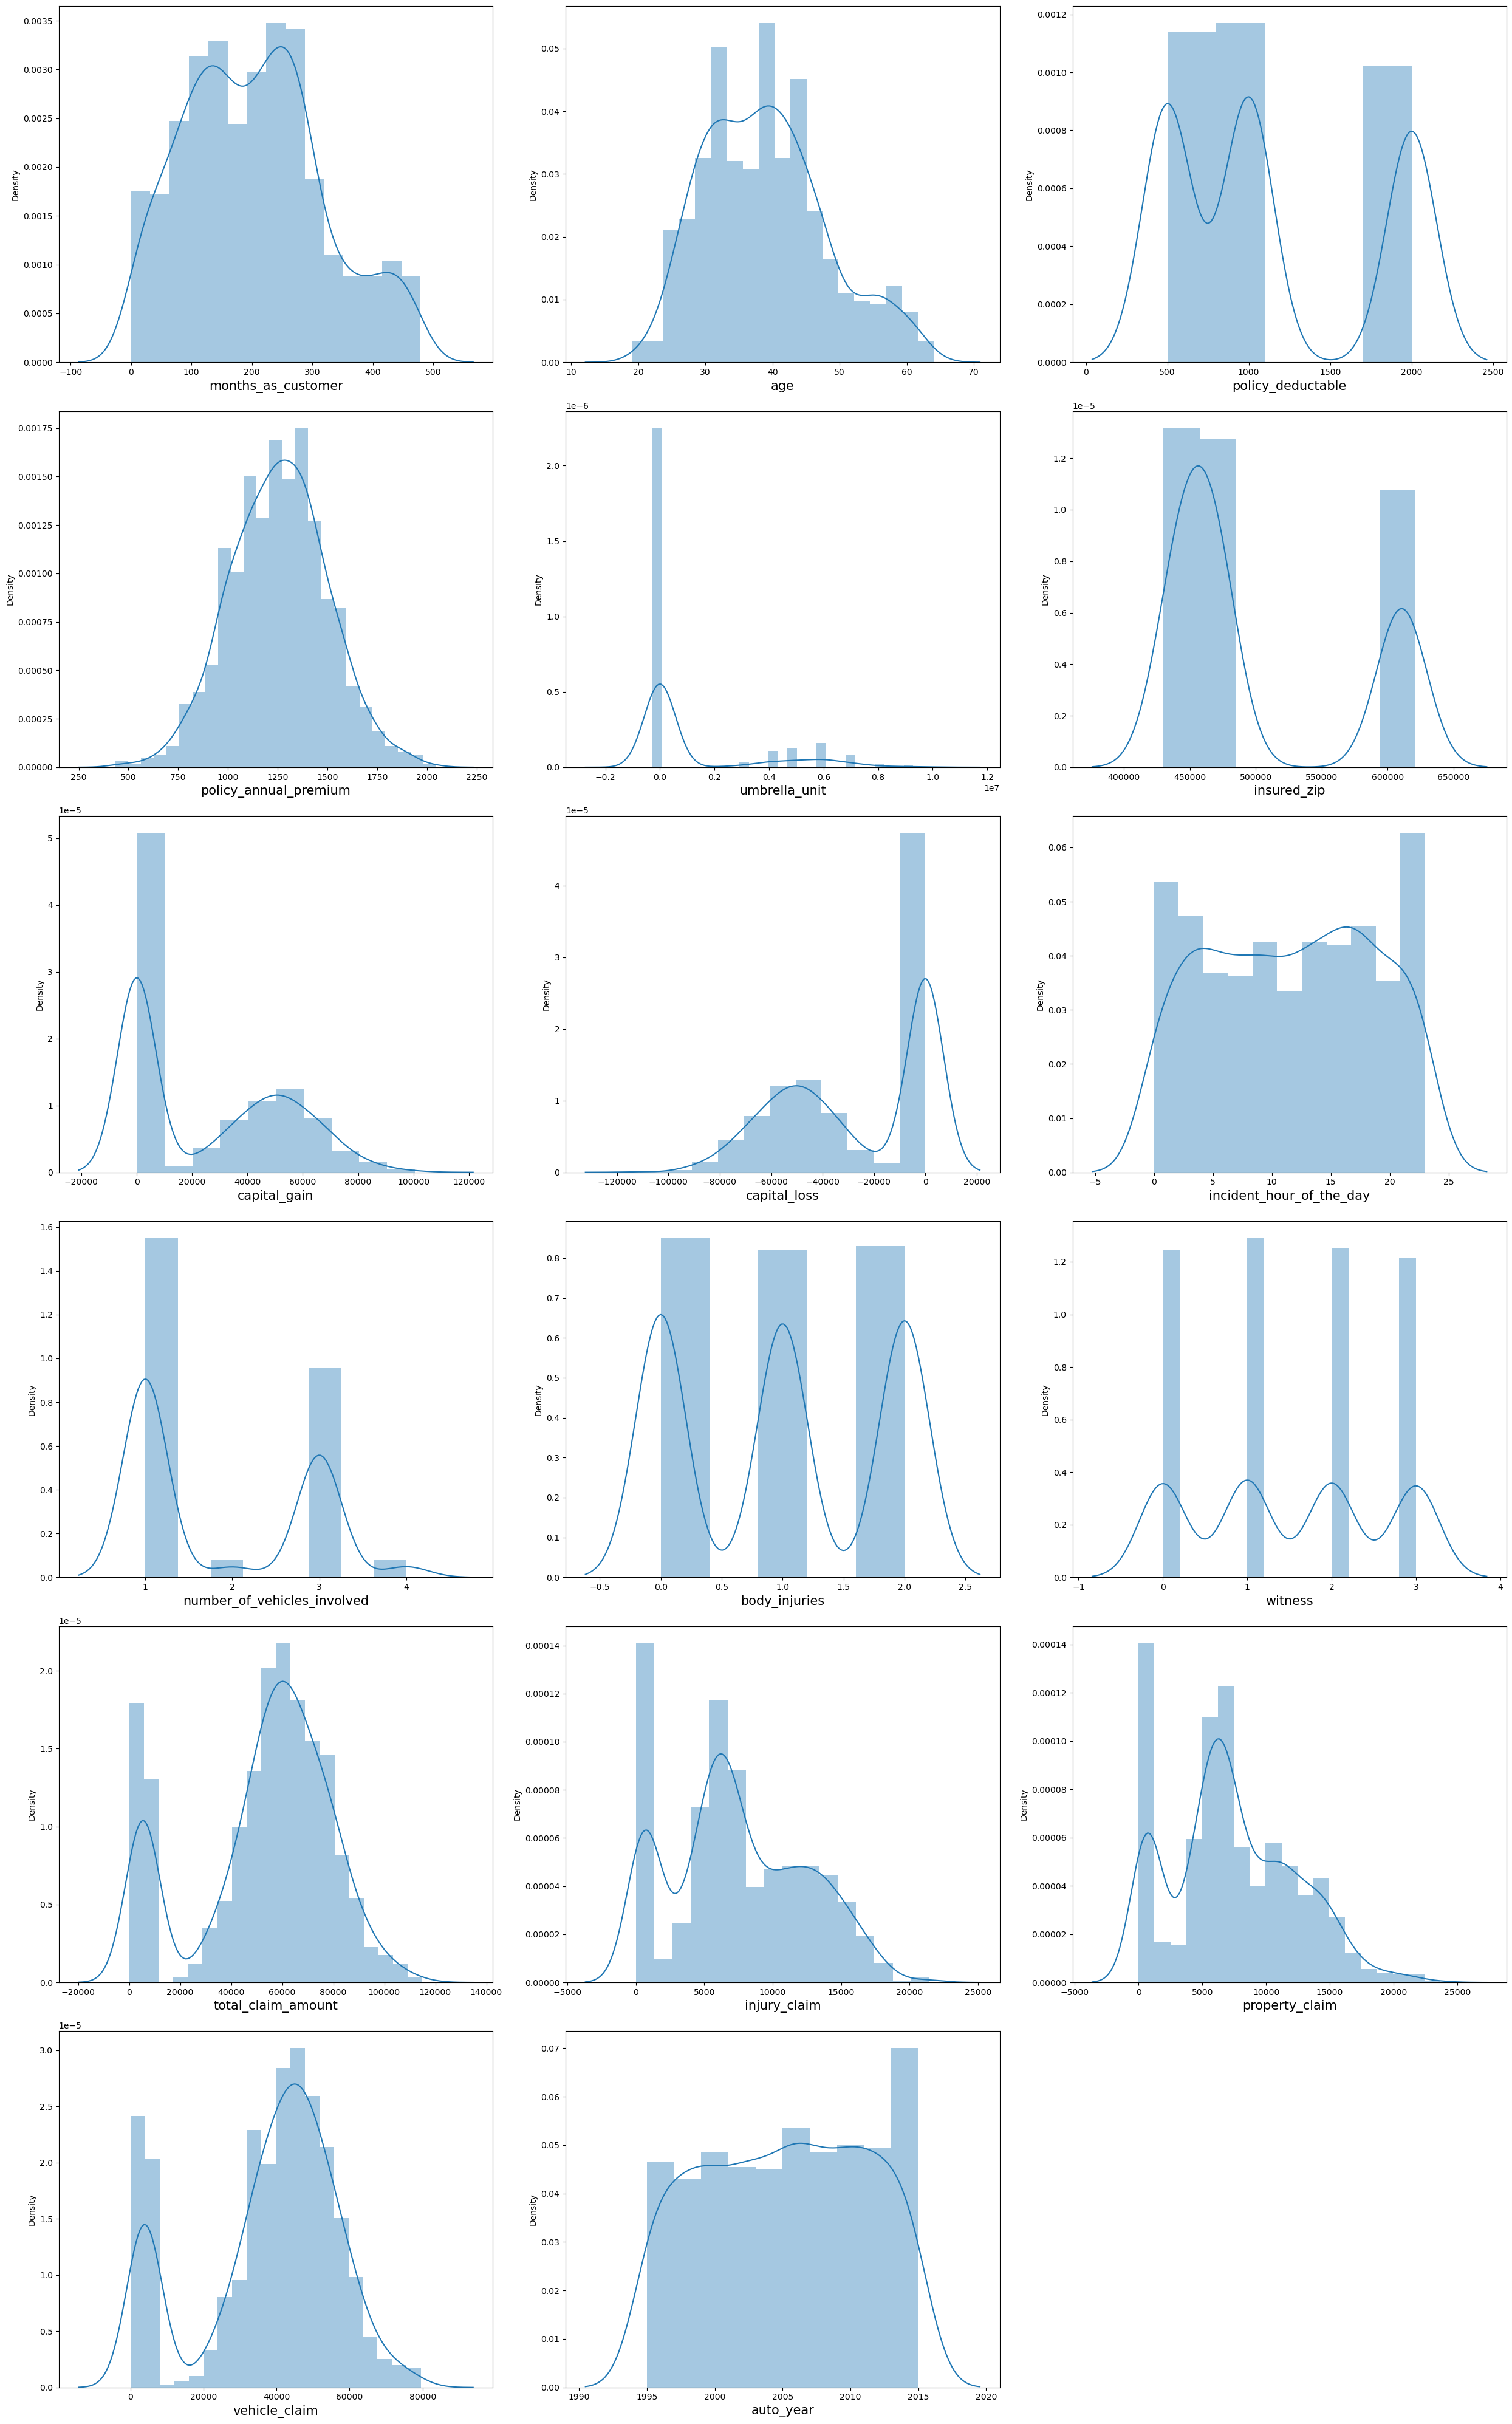

In [71]:
# Checking data distribution for numerical columns
plt.figure(figsize =(25, 85)).set_figheight(40)
plotnumber =1

for i in num_cols:
    if plotnumber <=17:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.tight_layout()

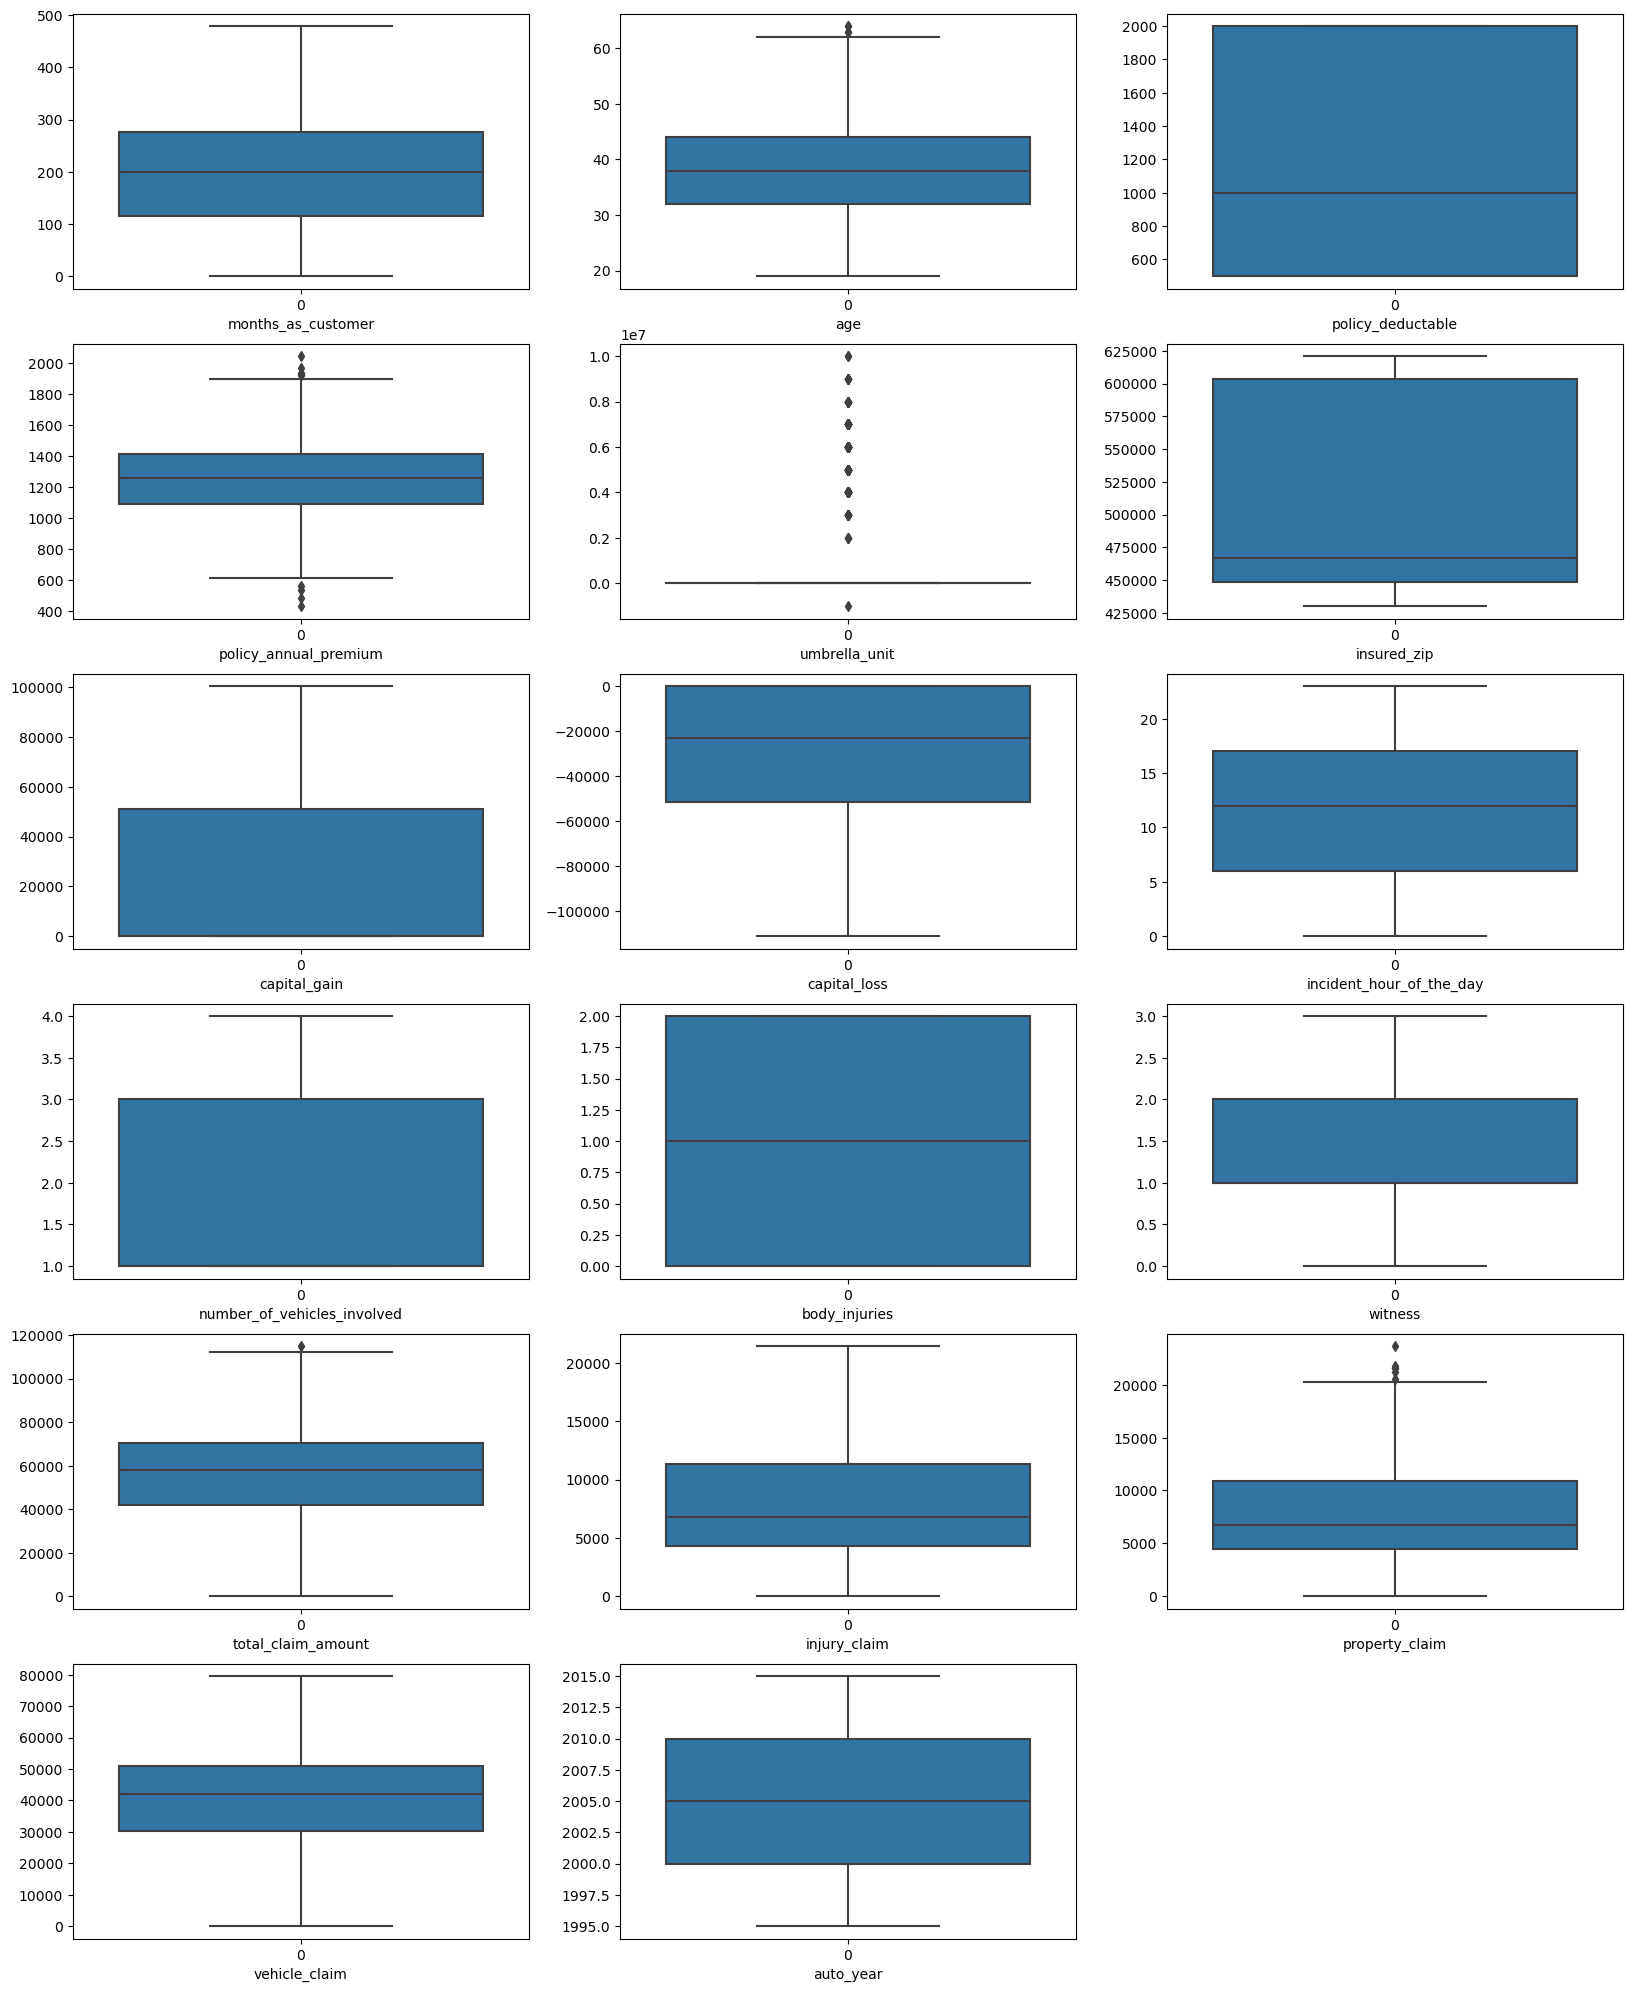

In [72]:
# Checking outliers using boxplot
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 17:
        plt.subplot(6, 3, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

__'age', 'policy_annual_premium', 'umbrella_unit', 'total_claim_amount', 'property_claim' are having outliers.__

In [73]:
# Removing outliers using IQR method

df_iqr =df[['age', 'policy_annual_premium', 'umbrella_unit', 'total_claim_amount', 'property_claim']]
Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3 - Q1

# For higher side
for i in df_iqr:
    high =Q3[i] + (1.5 * IQR[i])
    high_index =np.where(df_iqr[i] > high)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])
    
# For Lower Side
for i in df_iqr:
    lower =Q1[i] - (1.5 * IQR[i])
    lower_index =np.where(df_iqr[i] < lower)
    df_iqr =df_iqr.drop(df_iqr.index[lower_index])


In [74]:
# Removing outliers using zscore
df_zscore =df[['age', 'policy_annual_premium', 'umbrella_unit', 'total_claim_amount', 'property_claim']]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]

In [75]:
# Calculating dataloss after removing outliers by IQR and zscore
print("Original shape of dataset :",df.shape[0])
print('\n')
print("Shape of dataset after using IQR method :", df_iqr.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after using zscore method :", df_zscore.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Original shape of dataset : 1000


Shape of dataset after using IQR method : 782
Data loss after using IQR method : 21.8


Shape of dataset after using zscore method : 981
Data loss after using IQR method : 1.9


__We will use zscore to remove outliers as the data loss is only 1.9%.__

In [76]:
# Removing outliers using zscore
df =df[(z < 3).all(axis =1)]
df.shape

(981, 37)

In [77]:
#Checking skewness in the dataset
df[num_cols].skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_unit                  1.803065
insured_zip                    0.838685
capital_gain                   0.465985
capital_loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
body_injuries                  0.001877
witness                        0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
dtype: float64

In [78]:
# Removing skewness
df['umbrella_unit'] =np.cbrt(df['umbrella_unit'])
df['insured_zip'] =np.log(df['insured_zip'])

In [79]:
#Again Checking skewness in the dataset
df[num_cols].skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_unit                  1.605531
insured_zip                    0.803906
capital_gain                   0.465985
capital_loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
body_injuries                  0.001877
witness                        0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
dtype: float64

In [80]:
# Encoding categorical colums using OrdinalEncoder
OE =OrdinalEncoder()
for i in df:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_unit,insured_zip,insured_sex,insured_education_level,...,witness,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
352,65,26,1.0,0.0,500,1285.03,144.224957,13.034498,0.0,2.0,...,3,0.0,52200,5220,10440,36540,6.0,8.0,2011,0.0
835,370,55,1.0,2.0,2000,1389.13,191.293118,13.030693,1.0,3.0,...,2,0.0,9000,900,1800,6300,8.0,24.0,2015,0.0
927,156,32,0.0,1.0,500,1479.48,0.000000,13.004510,1.0,5.0,...,3,1.0,74690,6790,13580,54320,4.0,30.0,2008,1.0
136,200,40,0.0,0.0,1000,1439.34,0.000000,13.005429,0.0,2.0,...,0,0.0,3690,410,410,2870,5.0,13.0,2015,0.0
735,293,45,0.0,0.0,1000,1119.23,0.000000,13.011566,0.0,4.0,...,1,0.0,51210,11380,5690,34140,7.0,36.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,271,42,0.0,0.0,500,1515.30,0.000000,13.310084,0.0,2.0,...,0,0.0,93720,17040,8520,68160,8.0,24.0,2005,0.0
882,9,30,0.0,0.0,1000,1073.83,0.000000,12.991974,0.0,2.0,...,0,0.0,85690,15580,15580,54530,2.0,0.0,2011,0.0
472,360,51,0.0,1.0,1000,1152.12,0.000000,12.982340,1.0,6.0,...,0,1.0,90480,15080,15080,60320,2.0,38.0,2000,0.0
829,97,26,2.0,1.0,1000,1270.55,0.000000,13.078478,1.0,5.0,...,3,0.0,84920,7720,15440,61760,7.0,36.0,2006,1.0


__We have more no of features. We will try to reduce the no of features.__

In [81]:
# Seperating Features and label
x =df.drop(columns =['fraud_reported'])
y =df[['fraud_reported']]

In [82]:
best_features =SelectKBest(score_func =f_classif, k=20)
fit =best_features.fit(x, y)
df_score =pd.DataFrame(fit.scores_)
df_column =pd.DataFrame(x.columns)

# Concatenating Frames
feature_score =pd.concat([df_column, df_score], axis =1)
feature_score.columns =['Features Name', 'Scores']
print(feature_score.nlargest(20, 'Scores'))


                  Features Name      Scores
18            incident_severity  188.281458
32                vehicle_claim   29.266985
29           total_claim_amount   26.863616
31               property_claim   19.120770
19        authorities_contacted    8.958424
30                 injury_claim    7.670832
15                incident_date    3.577268
20               incident_state    2.591913
6                 umbrella_unit    2.445143
27                      witness    2.368433
11              insured_hobbies    2.250214
24  number_of_vehicles_involved    1.799561
21                incident_city    1.588043
16                incident_type    1.586943
26                body_injuries    1.448454
2                  policy_state    1.173095
3                    policy_csl    1.037856
33                    auto_make    0.964211
25              property_damage    0.676096
12         insured_relationship    0.662910


__We will take features with score > 1.__

In [83]:
n =feature_score.nlargest(17, 'Scores')
x =df[n['Features Name']]

In [84]:
x

,incident_severity,vehicle_claim,total_claim_amount,property_claim,authorities_contacted,injury_claim,incident_date,incident_state,umbrella_unit,witness,insured_hobbies,number_of_vehicles_involved,incident_city,incident_type,body_injuries,policy_state,policy_csl
352,1.0,36540,52200,10440,1.0,5220,6.0,5.0,144.224957,3,4.0,1,5.0,2.0,1,1.0,0.0
835,1.0,6300,9000,1800,3.0,900,34.0,0.0,191.293118,2,1.0,1,4.0,3.0,0,1.0,2.0
927,0.0,54320,74690,13580,2.0,6790,25.0,1.0,0.000000,3,3.0,1,4.0,2.0,1,0.0,1.0
136,1.0,2870,3690,410,3.0,410,0.0,5.0,0.000000,0,8.0,1,5.0,3.0,0,0.0,0.0
735,2.0,34140,51210,5690,1.0,11380,36.0,6.0,0.000000,1,8.0,3,3.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.0,68160,93720,8520,0.0,17040,37.0,4.0,0.000000,0,10.0,3,3.0,0.0,1,0.0,0.0
882,2.0,54530,85690,15580,3.0,15580,4.0,1.0,0.000000,0,7.0,1,4.0,2.0,0,0.0,0.0
472,2.0,60320,90480,15080,0.0,15080,10.0,6.0,0.000000,0,10.0,3,5.0,0.0,2,0.0,1.0
829,2.0,61760,84920,15440,2.0,7720,39.0,0.0,0.000000,3,5.0,3,5.0,0.0,2,2.0,1.0


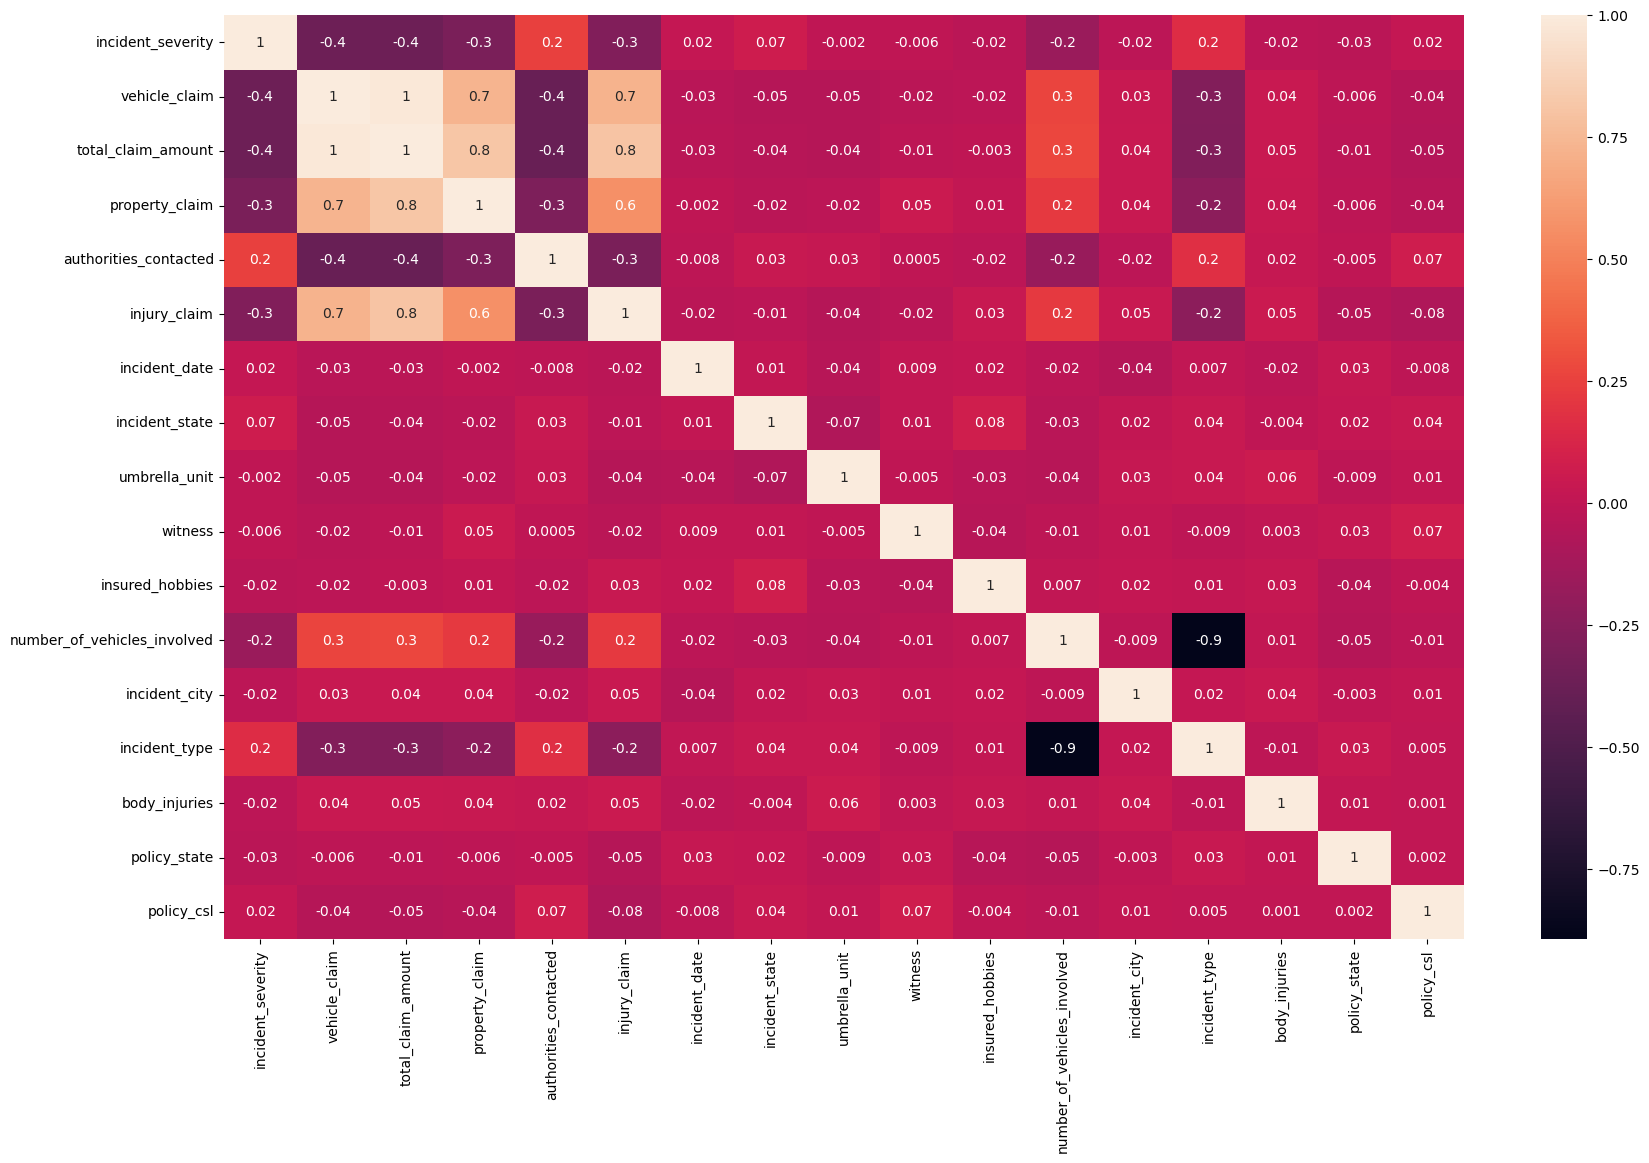

In [85]:
# Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(x.corr(), annot =True, fmt ='.1g')
plt.show()

__We found multicollinearity between 'vehicle_claim' and 'total_claim_amount'. We will delete one column

In [86]:
# Deleting total_claim_amount
x =x.drop(columns =['total_claim_amount'])

In [87]:
x

,incident_severity,vehicle_claim,property_claim,authorities_contacted,injury_claim,incident_date,incident_state,umbrella_unit,witness,insured_hobbies,number_of_vehicles_involved,incident_city,incident_type,body_injuries,policy_state,policy_csl
352,1.0,36540,10440,1.0,5220,6.0,5.0,144.224957,3,4.0,1,5.0,2.0,1,1.0,0.0
835,1.0,6300,1800,3.0,900,34.0,0.0,191.293118,2,1.0,1,4.0,3.0,0,1.0,2.0
927,0.0,54320,13580,2.0,6790,25.0,1.0,0.000000,3,3.0,1,4.0,2.0,1,0.0,1.0
136,1.0,2870,410,3.0,410,0.0,5.0,0.000000,0,8.0,1,5.0,3.0,0,0.0,0.0
735,2.0,34140,5690,1.0,11380,36.0,6.0,0.000000,1,8.0,3,3.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.0,68160,8520,0.0,17040,37.0,4.0,0.000000,0,10.0,3,3.0,0.0,1,0.0,0.0
882,2.0,54530,15580,3.0,15580,4.0,1.0,0.000000,0,7.0,1,4.0,2.0,0,0.0,0.0
472,2.0,60320,15080,0.0,15080,10.0,6.0,0.000000,0,10.0,3,5.0,0.0,2,0.0,1.0
829,2.0,61760,15440,2.0,7720,39.0,0.0,0.000000,3,5.0,3,5.0,0.0,2,2.0,1.0


In [88]:
# Resetting index number
x.reset_index(drop =True, inplace =True)

In [89]:
x

,incident_severity,vehicle_claim,property_claim,authorities_contacted,injury_claim,incident_date,incident_state,umbrella_unit,witness,insured_hobbies,number_of_vehicles_involved,incident_city,incident_type,body_injuries,policy_state,policy_csl
0,1.0,36540,10440,1.0,5220,6.0,5.0,144.224957,3,4.0,1,5.0,2.0,1,1.0,0.0
1,1.0,6300,1800,3.0,900,34.0,0.0,191.293118,2,1.0,1,4.0,3.0,0,1.0,2.0
2,0.0,54320,13580,2.0,6790,25.0,1.0,0.000000,3,3.0,1,4.0,2.0,1,0.0,1.0
3,1.0,2870,410,3.0,410,0.0,5.0,0.000000,0,8.0,1,5.0,3.0,0,0.0,0.0
4,2.0,34140,5690,1.0,11380,36.0,6.0,0.000000,1,8.0,3,3.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2.0,68160,8520,0.0,17040,37.0,4.0,0.000000,0,10.0,3,3.0,0.0,1,0.0,0.0
977,2.0,54530,15580,3.0,15580,4.0,1.0,0.000000,0,7.0,1,4.0,2.0,0,0.0,0.0
978,2.0,60320,15080,0.0,15080,10.0,6.0,0.000000,0,10.0,3,5.0,0.0,2,0.0,1.0
979,2.0,61760,15440,2.0,7720,39.0,0.0,0.000000,3,5.0,3,5.0,0.0,2,2.0,1.0


In [90]:
# Applying StandardScaler on feautes
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,incident_severity,vehicle_claim,property_claim,authorities_contacted,injury_claim,incident_date,incident_state,umbrella_unit,witness,insured_hobbies,number_of_vehicles_involved,incident_city,incident_type,body_injuries,policy_state,policy_csl
0,-0.195406,-0.071806,0.636399,-0.660433,-0.452809,-1.356349,0.815775,1.641647,1.364090,-1.009402,-0.821125,0.988688,0.762554,0.001248,-0.024567,-1.176582
1,-0.195406,-1.677722,-1.167083,1.067260,-1.337452,0.269778,-1.502519,2.333806,0.464781,-1.536865,-0.821125,0.497846,1.688378,-1.222563,-0.024567,1.310976
2,-1.260366,0.872413,1.291831,0.203413,-0.131307,-0.252906,-1.038860,-0.479247,1.364090,-1.185223,-0.821125,0.497846,0.762554,0.001248,-1.229581,0.067197
3,-0.195406,-1.859874,-1.457226,1.067260,-1.437794,-1.704805,0.815775,-0.479247,-1.333838,-0.306118,-0.821125,0.988688,1.688378,-1.222563,-1.229581,-1.176582
4,0.869555,-0.199259,-0.355099,-0.660433,0.808627,0.385930,1.279434,-0.479247,-0.434529,-0.306118,1.143567,0.007005,-1.089093,0.001248,-1.229581,-1.176582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.869555,1.607396,0.235625,-1.524280,1.967674,0.444006,0.352116,-0.479247,-1.333838,0.045523,1.143567,0.007005,-1.089093,0.001248,-1.229581,-1.176582
977,0.869555,0.883566,1.709304,1.067260,1.668697,-1.472501,-1.038860,-0.479247,-1.333838,-0.481939,-0.821125,0.497846,0.762554,-1.222563,-1.229581,-1.176582
978,0.869555,1.191047,1.604935,-1.524280,1.566308,-1.124046,1.279434,-0.479247,-1.333838,0.045523,1.143567,0.988688,-1.089093,1.225058,-1.229581,0.067197
979,0.869555,1.267520,1.680080,0.203413,0.059137,0.560158,-1.502519,-0.479247,1.364090,-0.833581,1.143567,0.988688,-1.089093,1.225058,1.180447,0.067197


In [91]:
# Checking VIF score
vif =pd.DataFrame()
vif['Features Name'] =x.columns
vif['Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features Name,Score
0,incident_severity,1.185526
1,vehicle_claim,3.354304
2,property_claim,2.209328
3,authorities_contacted,1.209064
4,injury_claim,2.142002
5,incident_date,1.008261
6,incident_state,1.020751
7,umbrella_unit,1.017159
8,witness,1.020857
9,insured_hobbies,1.019343


__VIF score of all the columns are less than 10, so will not delete any column.__

# EDA Completed

## Model Building

### Finding best random state

In [92]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFC =RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred =RFC.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum Accuracy is :", maxacc, "at random_state :", maxrs)

Maximum Accuracy is : 0.8610169491525423 at random_state : 113


In [93]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [94]:
# Initializing models
RFC =RandomForestClassifier()
ETC =ExtraTreesClassifier()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()

In [95]:
# Model Building

models ={'RandomForestClassifier' :RFC,
        'ExtraTreesClassifier' :ETC,
        'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifier' :BC,
        'DecisionTreeClassifier' :DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print("Model Name :", name)
    print("*"*35)
    print("Accuracy of the model is :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    print('\n')
    print("Cross Validation :", name)
    print("*"*35)
    score =cross_val_score(model, x, y, cv =5)
    print(score)
    print(score.mean())
    print("Difference between accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print("="*80)
    print('\n')
                               

Model Name : RandomForestClassifier
***********************************
Accuracy of the model is : 83.72881355932203
Confusion Matrix :
 [[215  13]
 [ 35  32]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       228
         1.0       0.71      0.48      0.57        67

    accuracy                           0.84       295
   macro avg       0.79      0.71      0.74       295
weighted avg       0.83      0.84      0.83       295



Cross Validation : RandomForestClassifier
***********************************
[0.85279188 0.83163265 0.75510204 0.76020408 0.83163265]
0.8062726613488034
Difference between accuracy of the model and cross validation is : 3.1015474244416974


Model Name : ExtraTreesClassifier
***********************************
Accuracy of the model is : 82.37288135593221
Confusion Matrix :
 [[217  11]
 [ 41  26]]
Classification Report :
               precision    recall  f1-score   support

      

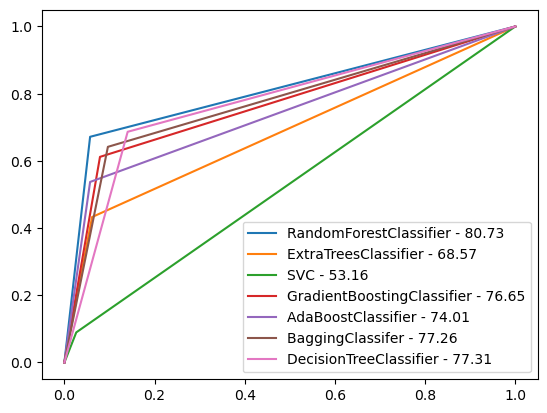

In [100]:
# Plotting ROC AUC score

models ={'RandomForestClassifier': RFC,
        'ExtraTreesClassifier' :ETC,
        'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifer' :BC,
        'DecisionTreeClassifier' :DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    fpr, tpr, _=metrics.roc_curve(y_test, pred)
    auc =round((metrics.roc_auc_score(y_test, pred))*100, 2)
    plt.plot(fpr, tpr, label =name +" - "+ str(auc))
plt.legend()

__RandomForestClassifier is our best model as it has highest roc_auc_score of 80.73% and accuracy score of 83.72%.__

# HyperParameter Tunning

In [101]:
parameters ={'n_estimators': [25, 50, 100, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9, None], 
            'max_leaf_nodes': [3, 6, 9, None]
            }

In [103]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9, None],
                         'n_estimators': [25, 50, 100, 150]})

In [104]:
GCV.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'n_estimators': 50}

In [107]:
Final_model =RandomForestClassifier(max_depth =6, max_features =None, max_leaf_nodes =None, n_estimators =50, random_state =113)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 87.11864406779661


__Accuracy improved from 83.72% to 87.11% after hyperparameter tunning.__

In [108]:
# Saving the Model
pickle.dump(Final_model, open('Insurance_fraud.pkl', 'wb'))

In [110]:
# Loading the model
loaded_model =pickle.load(open('Insurance_fraud.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 87.11864406779661


In [111]:
# Comparing Acutal Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
290,0.0,0.0
291,0.0,0.0
292,1.0,0.0
293,0.0,0.0
